# Session 22: The Simpsons!
# Classify the Simpsons family pictures into 4 clategories: Homer, Marge, Bart, and Lisa (Sorry Maggie!)


**Deadline for Submission: Tuesday Nov 20, 3PM**

## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

A partt of this code is developed by Francois Chollet, Deep Learning with Python. https://github.com/fchollet/deep-learning-with-python-notebooks  The code is edited by me for Applied AI class - Behnam Kia

## Dataset

The credit of collecting and preparing the Simpsons characters dataset goes to alexattia from Kaggle: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
 I downloaded this original dataset, eddited and modified it for Applied AI class use. 
You are downloading this edited, limited dataset from my shared google drive. To see the original dataset please follow the Kaggle link above.

Please download the dataset for homework following this link:
https://drive.google.com/file/d/1jDQcJvCmPn7q-eo-cT2fioNY-spavmUH/view

In [ ]:
# upload the simpsons dataset (the dataset you just downloaded to your local computer). I tried to automate this process using wget command and giving it the link. But had problems with Google drive links. If you come up with automate the process please let me know.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

You are unzipping the zipped dataset.

In [ ]:
!unzip the-simpsons-dataset.zip >/dev/null

Feel free to use "ls", and "cd" into folders to see the file system. Alternatively, please unzip the zipped file on your computer, and look around the folders to familiarize yourself with the files. We have training data, test data, and verification data, each stored in a seperate folder. Each folder contains 4 seperate folders, each for a character, Homer, Marge, Lisa, and Bart. 

In [ ]:
ls

Here we are defining Paths to different folders to make the process of working with the data easier. Feel free to change it based on your liking. 

In [ ]:
import os, shutil

base_dir = '/content/the-simpsons-dataset'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')



# Directory with our training Homer pictures
train_Homer_dir = os.path.join(train_dir, 'Homer')

# Directory with our training Marge pictures
train_Marge_dir = os.path.join(train_dir, 'Marge')

# Directory with our training Lisa pictures
train_Lisa_dir = os.path.join(train_dir, 'Lisa')

# Directory with our training Bart pictures
train_Bart_dir = os.path.join(train_dir, 'Bart')



# Directory with our validation Homer pictures
validation_Homer_dir = os.path.join(validation_dir, 'Homer')

# Directory with our validation Marge pictures
validation_Marge_dir = os.path.join(validation_dir, 'Marge')

# Directory with our validation Lisa pictures
validation_Lisa_dir = os.path.join(validation_dir, 'Lisa')

# Directory with our validation Bart pictures
validation_Bart_dir = os.path.join(validation_dir, 'Bart')





# Directory with our test Homer pictures
test_Homer_dir = os.path.join(test_dir, 'Homer')

# Directory with our test Marge pictures
test_Marge_dir = os.path.join(test_dir, 'Marge')

# Directory with our test Lisa pictures
test_Lisa_dir = os.path.join(test_dir, 'Lisa')

# Directory with our test Bart pictures
test_Bart_dir = os.path.join(test_dir, 'Bart')





#Step 1
Define a CNN model to classify these 4 characters from each other. Use training data to train the model. Test the trained model on the test data to assess the performance.
You CNN model is going to be nothing more than a series of conv layers and pooling layers one after another, and then flattening them feeding them into a regular feedforward network. Feel free to take a look at our CNN model we used for MNIST dataset.

CNN for Simpsons family member is going to be different from MNIST CNN. We are going to have a different number of output nodes (4 instead of 10). Also now inputs are color pictures, whereas MNIST dataset was grayscale.. So we should adjust the input shape properly. In Session 19: CNNs: overfitting, data augmentation, and transfer learning example, we were working on color data. So you can check that model out.

Of course you could use a feed forward fully connected network instead of CNN, but we know for this type of image processing CNN putperform regular feed forwards networks.  Can you remember why?

After defining and compiling your model, take a look at the summary of your model to insure that things are good. To see the summary, you are going to run "your model name".summary()

Also use a more effieint and advanced optimizer for your model. What did you learn during your last homework? RMSProp vs. SGD. Adam?


## Automating the process of feeding data to the model during training

Feel free to follow your own method of providing the training data to the model. But please note that your training data are distributed in different folders. You have to go and read them and put them all in one numpy arrays and create the labels array as well, and give each image a proper label based on from which folder you read the image (Homer, Lisa, Bart or Marge). 

We automated this process in the class using ImageDataGenerator class so we don't have to this ourselves. Another good thing about ImageDataGenerator is that its function flow_from_directory reads images batch by batch - not all at once. Imagine we have a dataset of gigantic size (gigabytes if not terabytes). We cannot possibly read the entire dataset as a numpy array and give at at once to the model during training (without compromising the performance). We have to read the images batch by batch as we train the model. ImageDataGenerator.flow_from_directory does it for us. Go and take a look at "Session 19: Working with small dataset, overfitting, data augmentation, and transfer learning" and see how we use it. Last but not least ImageDataGenerator class can preprocess and augment the images.

Please note that at step 1 there is no need for augmentation. So look at "Base Model with Small Dataset" section of "Session 19: Working with small dataset, overfitting, data augmentation, and transfer learning."

Also note that you have to make some changes to ImageDataGenerator that we are using from "Session 19: Working with small dataset, overfitting, data augmentation, and transfer learning." In that example, class_mode='binary' because we had just two folder in training folder, Cat and Dog. Here we have multiple categories. Can you guess what parameter values shouldwe use instead? You can check Keras's documentation:
https://keras.io/preprocessing/image/

## Train your model
Depending on how you provide the training data to the model, you need to use .fit or .fit_generator instruction. 
Please provide validation dataset to your model wheile trainign so that you can observe the performance of your model over your verification data as well. Please "Session 19: Working with small dataset, overfitting, data augmentation, and transfer learning" in order to see how we did it - or do it in your own way!

Save the outputs of model fitting in a history varible so we can see the performance over epochs. Please see "Session 19: Working with small dataset, overfitting, data augmentation, and transfer learning" to see how we did it.

## The base model performance
Plot the history to see the performance over epochs. Below I plotted the performance of my model trained on the same Simpsons dataset. Expect something similiar for your own model as well.

What are your thoughts on the performance? How is training accuracy? How about the validation accuracy? How much gap is between them? How can we reduce the gap?

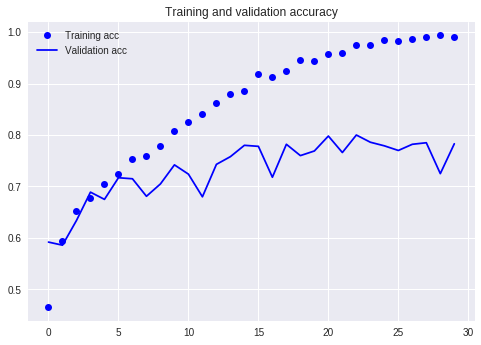

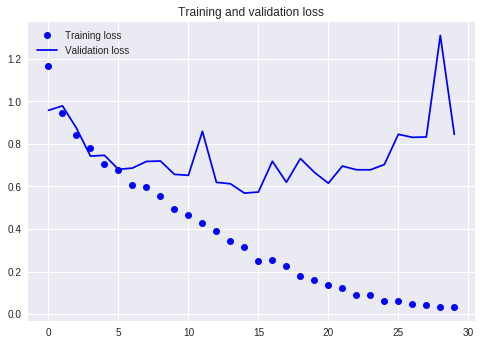

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Step 2: Fight against overfitting

The model accuracy reaches 100%, but accuracy over the verification data hovers around 80%. This is an obviously an overfitting. So why this happened? Can you guess?

We are dealing with a very powerful learner (CNN), but not enough training data to fit them properly. So CNN ends up overfitting to the training data. We have multiple options to fight against overfitting:

**Using a less powerful model with fewer parameters**: Granted this less powerful model may not overfit the training data, but it may not fit the training data either, resulting in a high bias error. High Bias error means that the model failed to learn from the training data and does not represent and fit the training data. Well, this is not a very good option. Our CNN is already a basic CNN, and there is not too much to chop. 


**Regularization**: "Regularization is any change we make to a learning algorithm (here CNN) that reduces its generalization error but not training error." This is a definition from Goodfellow's book. There are different regularization methods, such as L2, dropout, early stopping, etc. Note that despite Goodfellow's definition, in practice we are still going to get a slightly worse training accuracy, however our generalization error (the gap between training error and verification) is going to be reduced.

**Augmentation**: The root cause of overfitting is having too many parameters to learn and few examples to learn from. By augmentation we are increasing the number of examples to learn from, and we prevent the learner from memorizing the training set. 

**Transfer learning**: If we don't have enough examples to learn the values of the parameters from, why not borrow the values for such parameters from other applications where they have large enough training dataset to fit these parameters! This is the main idea behind transfer learning. 

Let's put these ideas to use!


## Dropout
Dropout is the most popular regulazition technique in deep learning. Dropout is a simple algorithm. During training, when dropout is applied to a leyer, a neuron can be simply "dropped out"  with a probability of p and not used during training. You provide the probability p a parameter. You can simply define and implement this dropout method by defining a dropout layer in your network that performs this specific task. Please see Keras documentation to include a dropout layer in your model:
https://keras.io/layers/core/

As an example, model.add(layers.Dropout(0.5)) adds a dropout layer with probability of 0.5. Add such a a layer as a hidden layer to the feedforward part of your CNN. You can learn more about dropout and how and why it works by reading pages 251-261 of Goodfellow book, or watch Andrew Ng's video:
https://www.youtube.com/watch?v=D8PJAL-MZv8

This is the outputs of my model when I applied dropout. It is better than before, but not perfect! We need to do more to improve the performance.

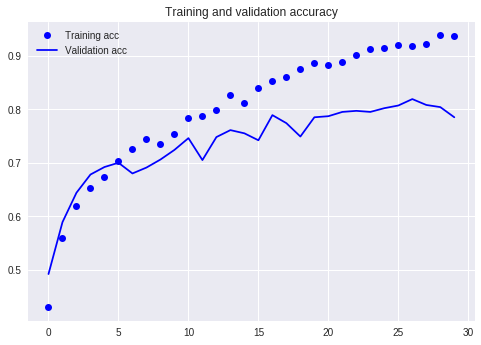

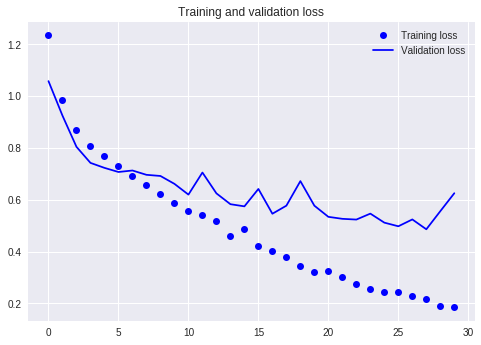

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data augmentation
With data augmentation we are artificially adding to our training dataset, and making it harder for the learner to memorize the dataset.
As an example, see how we can create four different versions of the same Bart image by augmenting it.

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

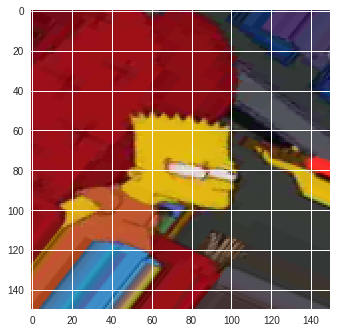

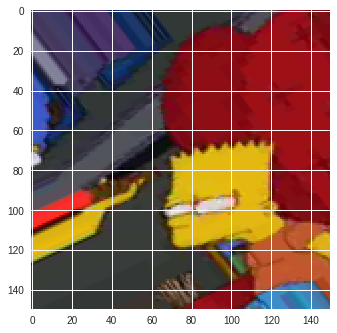

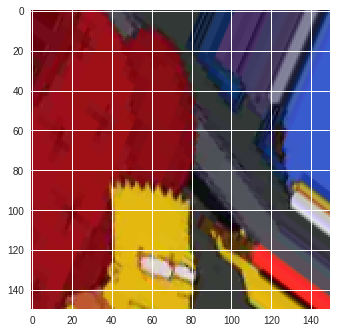

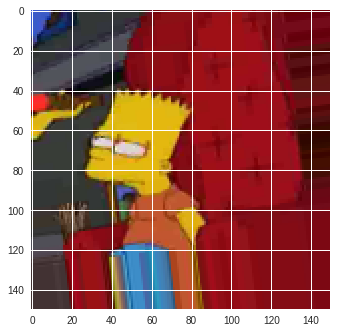

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_Bart_dir, fname) for fname in os.listdir(train_Bart_dir)]

# We pick one image to "augment"
img_path = fnames[7]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Rewrite your ImageDataGenerators and add augmentation to them. And train your model with this augmented data. Check the results. 

This is my model's outputs. The gap between training and validation accuracy is gone. So no more overfitting. I could let the training go beyond 100 epochs because as you see the model was still learning wirthout overfitting (both validation and training accuracies were going up). Please let your model training go beyond 100 if your model is still learning without overfitting.

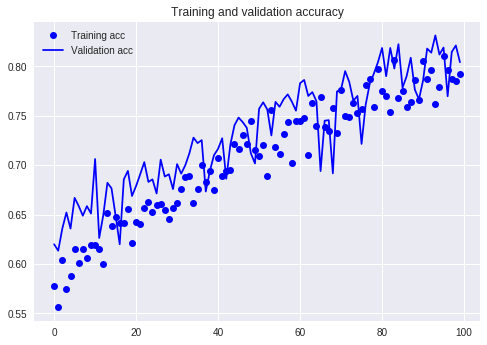

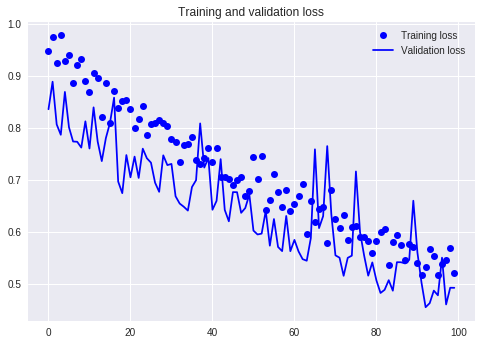

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Step 3: Using a pretrained model 
Download one of those pretrained models and use it in your model.
For example, here we are downloding the base of VGG16 model. Please see Session 19: CNNs: overfitting, data augmentation, and transfer learning to see how we used it. 

Add your feedforward network to it and train it with the training data.

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 5s 0us/step


In [ ]:
train_features = np.reshape(train_features, (3000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (800, 4 * 4 * 512))

Plot your results. Below you see my model's performance with the original dataset (no augmented data). It is better now, but not perfect. There is some gap between training and validation accuracy.



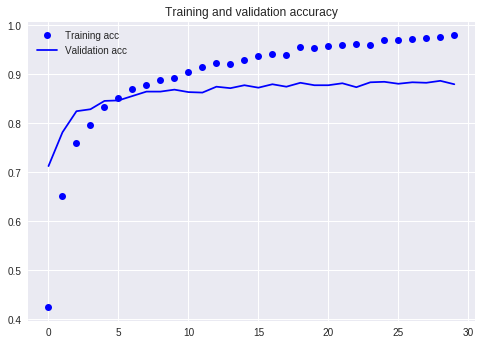

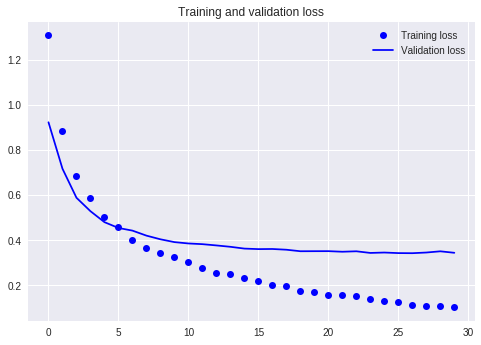

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can do multiple different things, start using augmented data, add regularization, and fine tune the last layer of the pretrained network. Please see Session 19: CNNs: overfitting, data augmentation, and transfer learning. 





#Step 4: Using augmented data, add dropout, add pretrained base model to your model and fine tune last layer of it

I did them all, and finally got %96.7 accurcay over the test data! I could spend a little bit more time and further improve my model and set better hyperparameters. Can you design a model that outperforms mine on the test data?

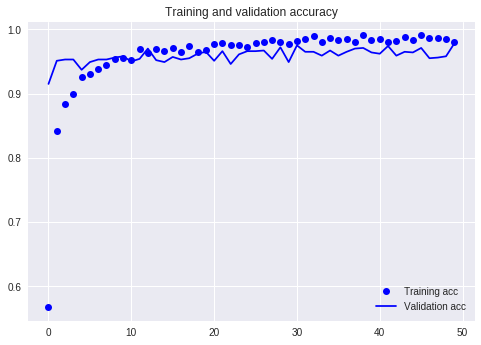

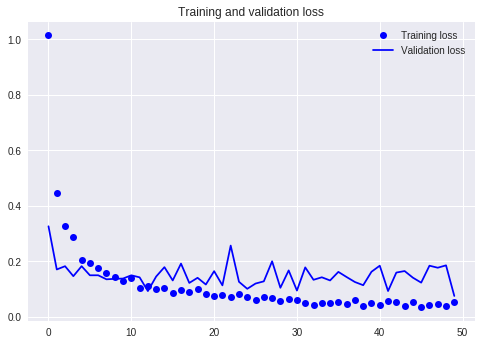

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=40)
print('test acc:', test_acc)

Found 800 images belonging to 4 classes.
test acc: 0.9674999937415123


# Step 5: 
After you finish training your model, go around your department and show your achievement to your friends and brag about your AI program that can automatically identify the Simpsons... well except Margie!

![alt text](https://i0.wp.com/www.cordcuttersnews.com/wp-content/uploads/2017/07/simpsons-2.jpg?ssl=1)